## HN Top Users Analysis

This is a quick analysis of top users, both in number of submissions and upvotes.

The dataset can be found here: https://www.kaggle.com/datasets/santiagobasulto/all-hacker-news-posts-stories-askshow-hn-polls

In [58]:
import random

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Setup

In [2]:
df = pd.read_csv(
    'hn_data/hn.csv',
    parse_dates=['Created At'],
    dtype={
        'Post Type': 'category'
    })

In [3]:
df.shape

(3713220, 8)

In [4]:
df.head()

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0


In [6]:
df['Post Type'].value_counts()

story      3454168
ask_hn      146851
show_hn     110476
poll          1725
Name: Post Type, dtype: int64

## Overall

In [365]:
user_df = df.groupby('Author').agg({'Object ID': ['size'], 'Points': ['sum']})

In [366]:
user_df.columns = user_df.columns.droplevel(0)

In [367]:
user_df.rename(columns={'size': 'Num Posts', 'sum': 'Total Points'}, inplace=True)

#### Users with most submissions

In [368]:
user_df.sort_values(by='Num Posts', ascending=False).head(10)

,Num Posts,Total Points
Author,,
rbanffy,25690,222324
Tomte,19820,245532
tosh,15121,265919
pseudolus,13556,259426
jonbaer,13042,125386
ingve,12088,357248
evo_9,8978,81400
bookofjoe,8970,93254
prostoalex,8710,232534


Text(0.5, 1.0, 'Users with most submissions')

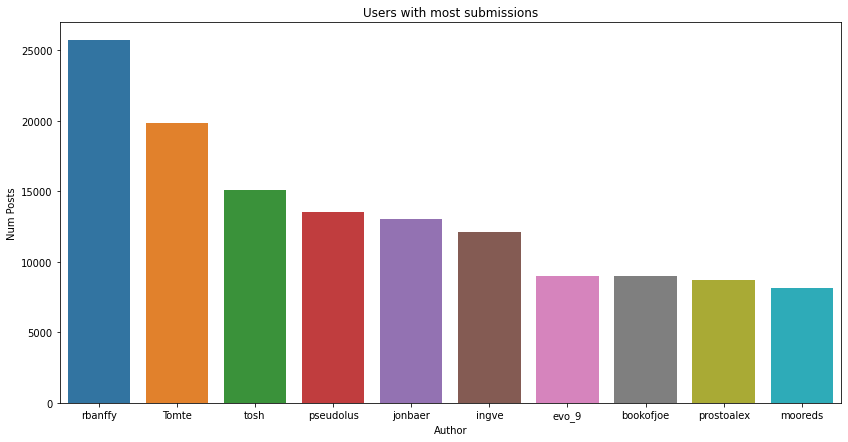

In [371]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Num Posts', ascending=False).head(10).reset_index(), x='Author', y='Num Posts', ax=ax)
ax.set_title("Users with most submissions")

In [372]:
fig.patch.set_facecolor('white')
fig.savefig("authors/users_most_submissions.png")

#### Users with highest "score" (upvotes)

In [373]:
user_df.sort_values(by='Total Points', ascending=False).head(10)

,Num Posts,Total Points
Author,,
ingve,12088,357248
tosh,15121,265919
pseudolus,13556,259426
Tomte,19820,245532
prostoalex,8710,232534
rbanffy,25690,222324
todsacerdoti,6938,207497
danso,4773,190013
luu,4667,160118


Text(0.5, 1.0, 'Authors with most points (upvoted submissions)')

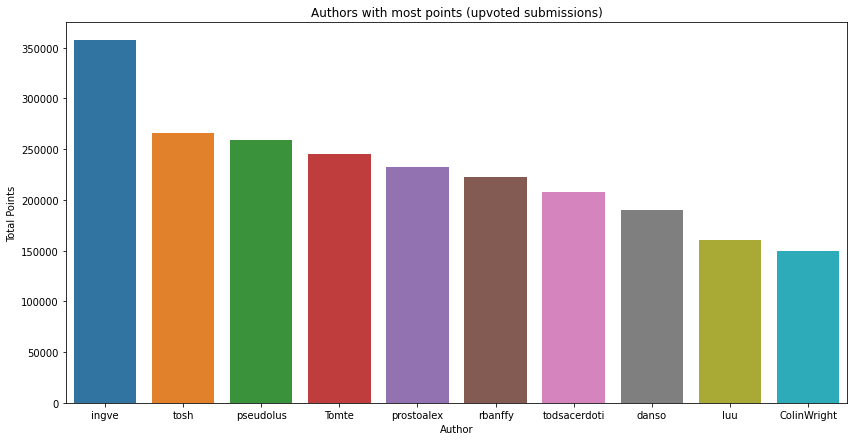

In [383]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Total Points', ascending=False).head(10).reset_index(), x='Author', y='Total Points', ax=ax)
ax.set_title("Authors with most points (upvoted submissions)")

In [384]:
fig.patch.set_facecolor('white')
fig.savefig("authors/users_most_points.png")

#### Point to submission ratio

In [407]:
user_df['Points/Submission ratio'] = user_df['Total Points'] / user_df['Num Posts']

In [411]:
user_df.sort_values(by='Points/Submission ratio', ascending=False).head(10)

,Num Posts,Total Points,Points/Submission ratio
Author,,,
phantop,1,4240,4240.0
fusl,1,2636,2636.0
genedangelo,1,2634,2634.0
megadeth,1,2595,2595.0
fejkp,1,2585,2585.0
rcoveson,1,2105,2105.0
ews,1,2091,2091.0
totablebanjo,1,2051,2051.0
benhurmarcel,1,2023,2023.0


#### Submissions vs Total Upvotes

In [413]:
prolific_users_df = user_df.sort_values(by='Num Posts', ascending=False).head(50)

In [414]:
users_to_highlight = set(
    list(prolific_users_df.head(15).index) +
    list(prolific_users_df.sort_values(by='Total Points', ascending=False).head(15).index))

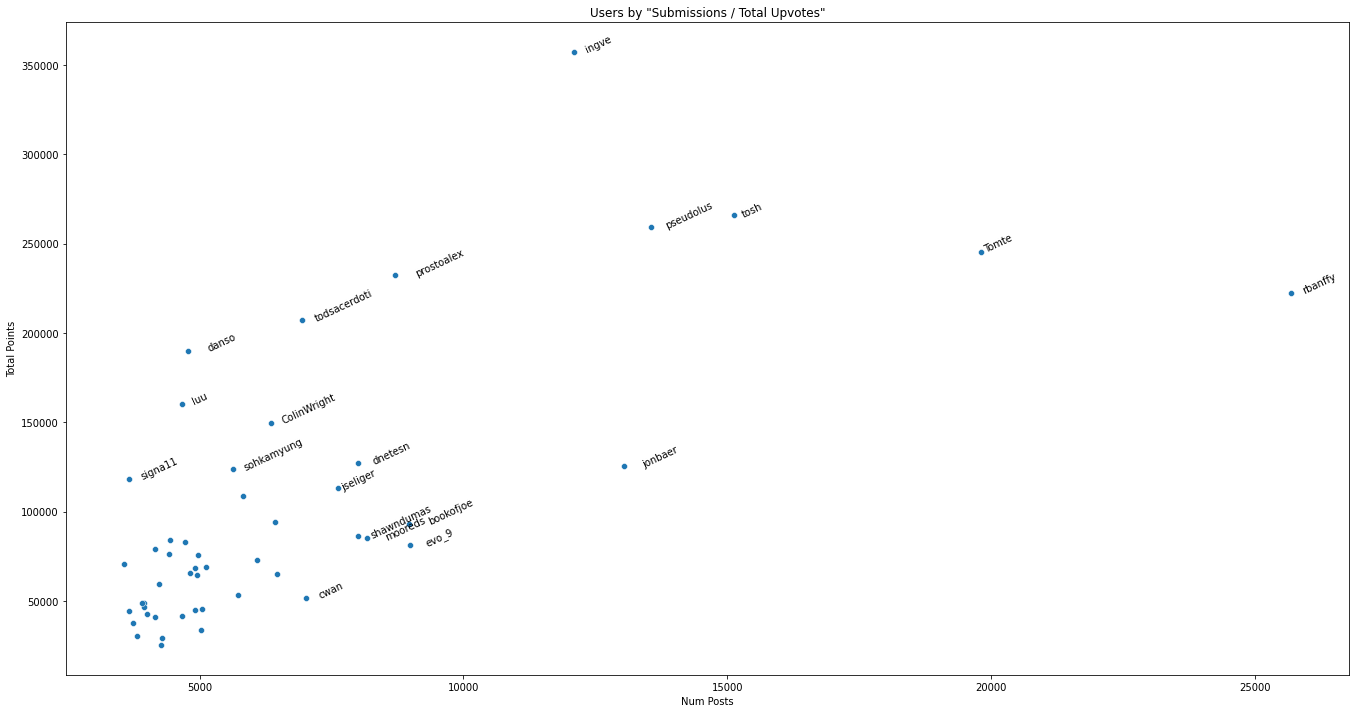

In [404]:
fig, ax = plt.subplots(figsize=(23, 12))
sns.scatterplot(data=prolific_users_df, x='Num Posts', y='Total Points', ax=ax)
ax.set_title('Users by "Submissions / Total Upvotes"')

for user in users_to_highlight:
    values = prolific_users_df.loc[user]
    ax.text(values['Num Posts'] + (350 * random.random()), values['Total Points'] - (1200 * random.random()), user, rotation=25)

In [405]:
fig.patch.set_facecolor('white')
fig.savefig("authors/users_submissions_vs_points.png")

#### Yearly Submissions by Top Posters

In [422]:
top_users_submissions_df = df.loc[
    (df['Author'].isin(user_df.sort_values(by='Num Posts', ascending=False).head(10).index)) &
    (df['Created At'] <= '2022-07-31')
]

In [423]:
yearly_df = top_users_submissions_df.sort_values(by='Created At').groupby(
    ['Author', pd.Grouper(key='Created At', freq='6M')]).size().to_frame().reset_index().rename(columns={0: 'Number of Submissions'})

In [424]:
yearly_df['Author'].unique()

array(['Tomte', 'bookofjoe', 'evo_9', 'ingve', 'jonbaer', 'mooreds',
       'prostoalex', 'pseudolus', 'rbanffy', 'tosh'], dtype=object)

Text(0.5, 1.0, 'Submissions per user every 6 months')

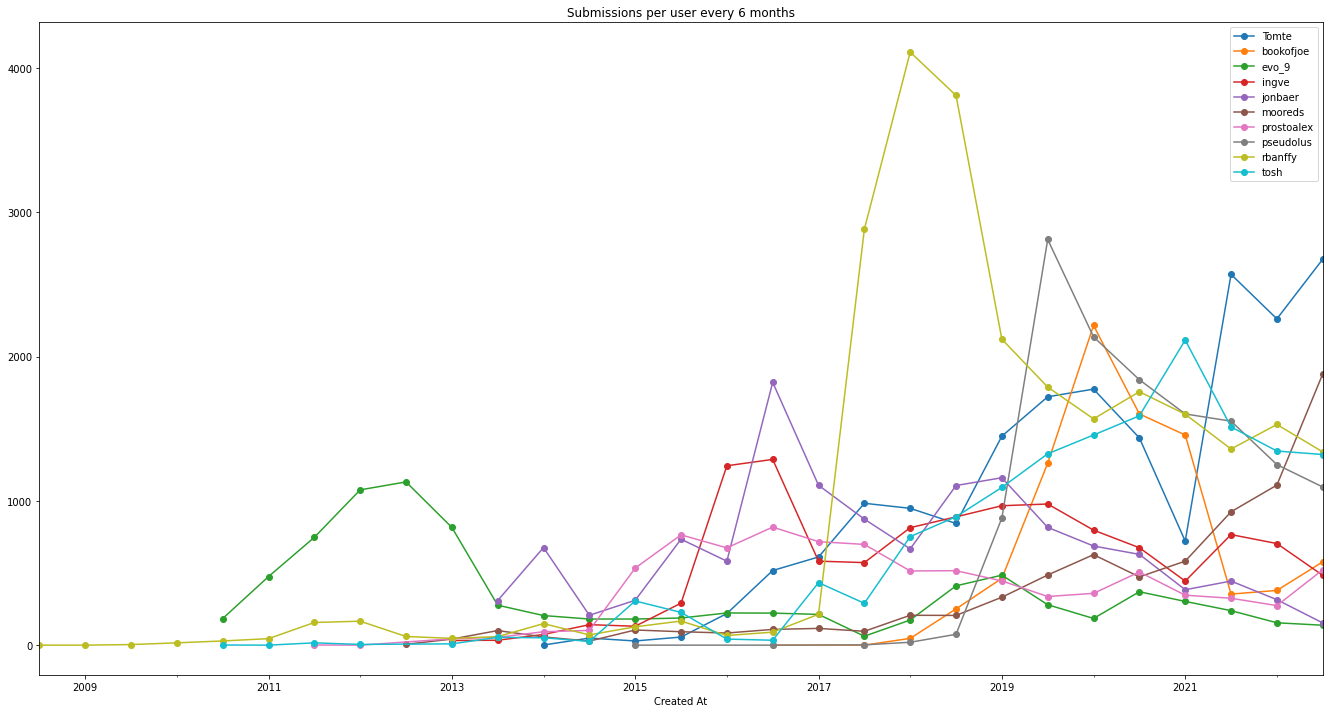

In [425]:
fig, ax = plt.subplots(figsize=(23, 12))
for author in yearly_df['Author'].unique():
    yearly_df.loc[yearly_df['Author'] == author].set_index('Created At')['Number of Submissions'].plot(ax=ax, marker="o")
ax.legend(list(yearly_df['Author'].unique()))
ax.set_title("Submissions per user every 6 months")

In [426]:
fig.patch.set_facecolor('white')
fig.savefig("authors/ts_top_submissions_every_6_months.png")

#### Points gained every 6 months by top earners

In [427]:
top_earners_submissions_df = df.loc[
    (df['Author'].isin(user_df.sort_values(by='Total Points', ascending=False).head(10).index)) &
    (df['Created At'] <= '2022-07-31')
]

In [428]:
yearly_df = top_earners_submissions_df.sort_values(by='Created At').groupby(
    ['Author', pd.Grouper(key='Created At', freq='6M')])['Points'].sum().to_frame().reset_index()

Text(0.5, 1.0, 'Points earned per user every 6 months')

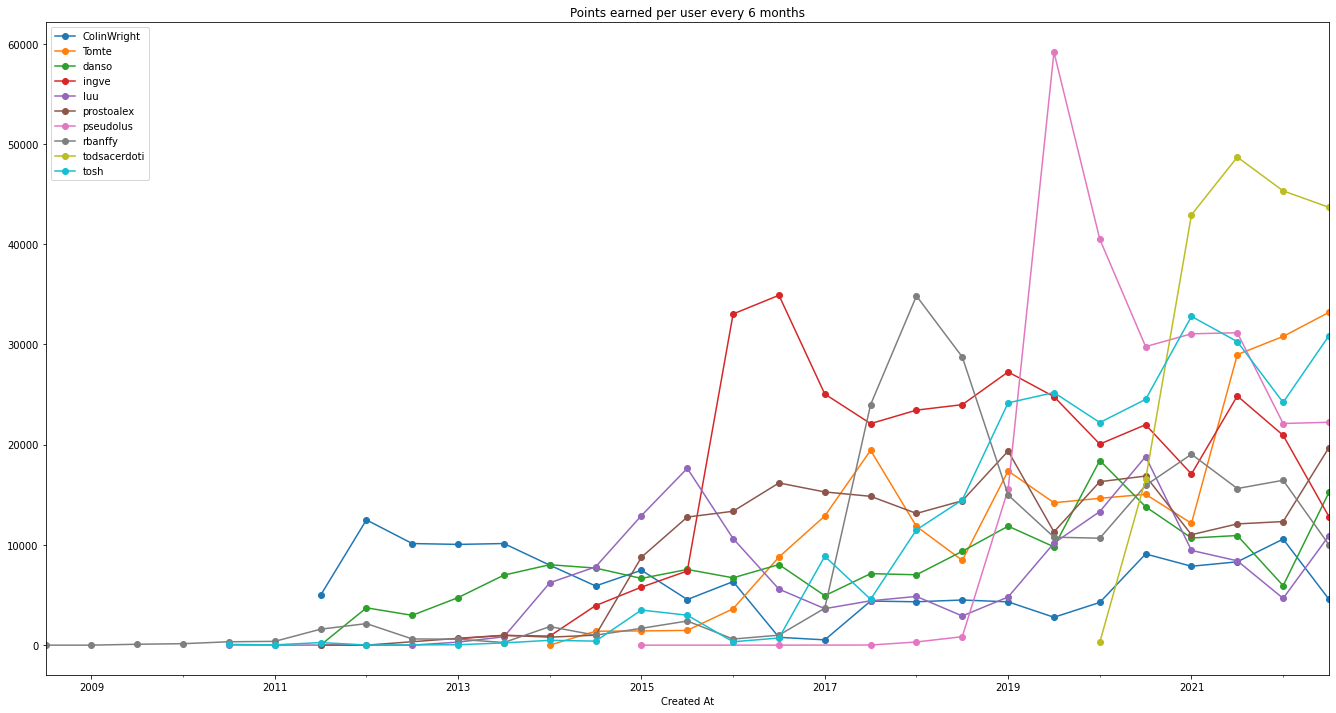

In [431]:
fig, ax = plt.subplots(figsize=(23, 12))
for author in yearly_df['Author'].unique():
    yearly_df.loc[yearly_df['Author'] == author].set_index('Created At')['Points'].plot(ax=ax, marker="o")
ax.legend(list(yearly_df['Author'].unique()))
ax.set_title("Points earned per user every 6 months")

In [432]:
fig.patch.set_facecolor('white')
fig.savefig("authors/ts_points_earned_every_6_months.png")

#### Cumulative sum of points gained for top users

In [433]:
top_earners_submissions_df = df.loc[
    df['Author'].isin(user_df.sort_values(by='Total Points', ascending=False).head(10).index)
]

In [434]:
yearly_df = top_earners_submissions_df.sort_values(by='Created At').groupby(
    ['Author', pd.Grouper(key='Created At', freq='6M')])['Points'].sum().to_frame().reset_index()

Text(0.5, 1.0, 'Cumulative sum of points earned per user every 6 months')

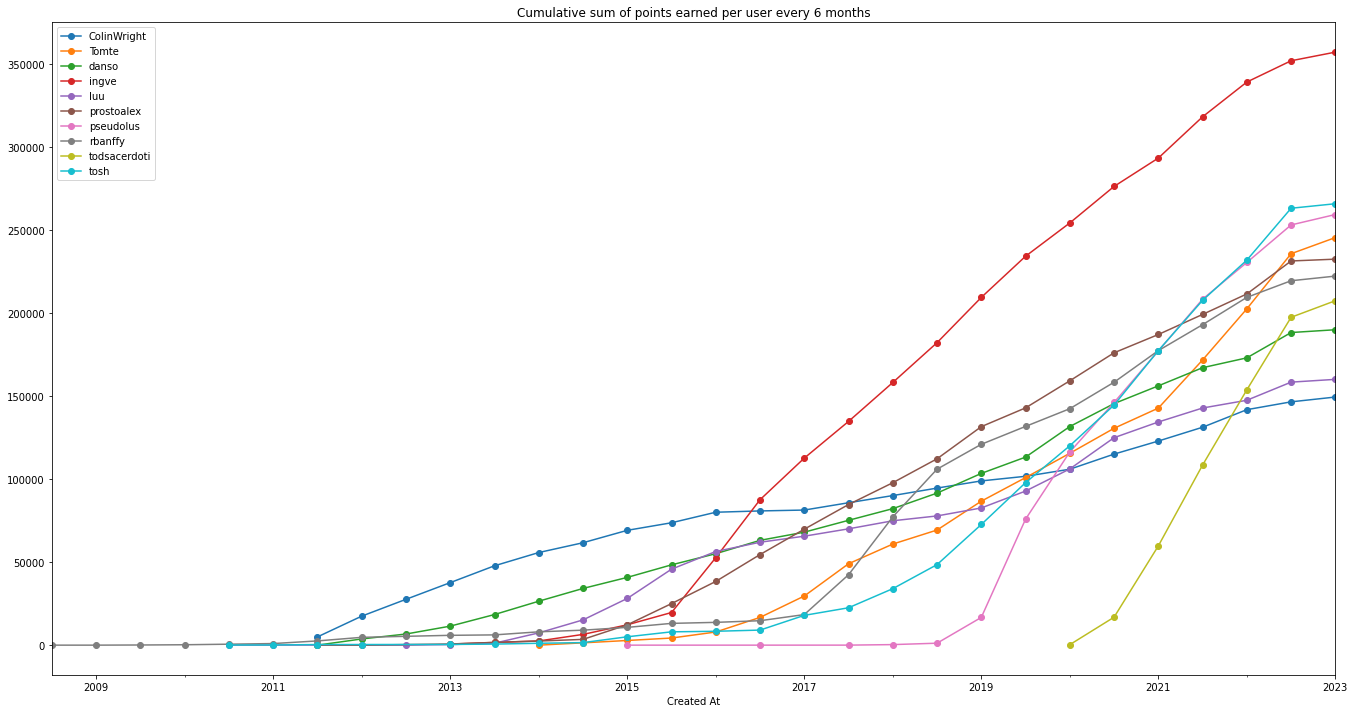

In [437]:
fig, ax = plt.subplots(figsize=(23, 12))
for author in yearly_df['Author'].unique():
    yearly_df.loc[yearly_df['Author'] == author].set_index('Created At')['Points'].cumsum().plot(ax=ax, marker="o")
ax.legend(list(yearly_df['Author'].unique()))
ax.set_title("Cumulative sum of points earned per user every 6 months")

In [438]:
fig.patch.set_facecolor('white')
fig.savefig("authors/cumsum_top_earners.png")

---

## Show HN

In [439]:
df['Post Type'].value_counts()

story      3454168
ask_hn      146851
show_hn     110476
poll          1725
Name: Post Type, dtype: int64

In [440]:
show_df = df.query("`Post Type` == 'show_hn'")

In [441]:
user_df = show_df.groupby('Author').agg({'Object ID': ['size'], 'Points': ['sum']})

In [442]:
user_df.columns = user_df.columns.droplevel(0)

In [443]:
user_df.rename(columns={'size': 'Num Posts', 'sum': 'Total Points'}, inplace=True)

#### Users with most submissions

In [444]:
user_df.sort_values(by='Num Posts', ascending=False).head(10)

,Num Posts,Total Points
Author,,
alexellisuk,482,3135
atum47,213,3677
fiatjaf,129,1059
abava,123,188
graderjs,109,1488
iogf,101,758
soheil,98,732
max0563,90,929
chris140957,84,887


Text(0.5, 1.0, 'Users with most "Show HN" submissions')

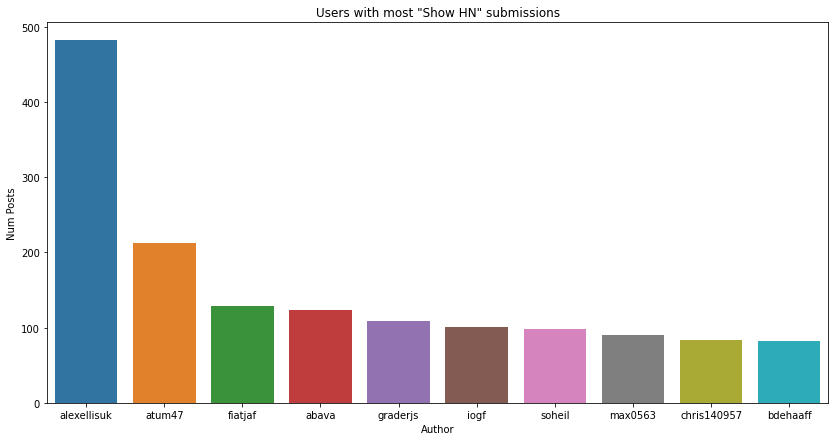

In [445]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Num Posts', ascending=False).head(10).reset_index(), x='Author', y='Num Posts', ax=ax)
ax.set_title('Users with most "Show HN" submissions')

In [446]:
fig.patch.set_facecolor('white')
fig.savefig("authors/show_hn_most_submissions.png")

#### Users with highest upvotes

In [450]:
user_df.sort_values(by='Total Points', ascending=False).head(10)

,Num Posts,Total Points
Author,,
atum47,213,3677
bbx,15,3662
StavrosK,39,3547
jart,10,3442
olalonde,8,3437
fogleman,21,3383
alexellisuk,482,3135
pkiller,2,2804
shihn,26,2685


Text(0.5, 1.0, 'Users with most points (upvotes) in Show HN submissions')

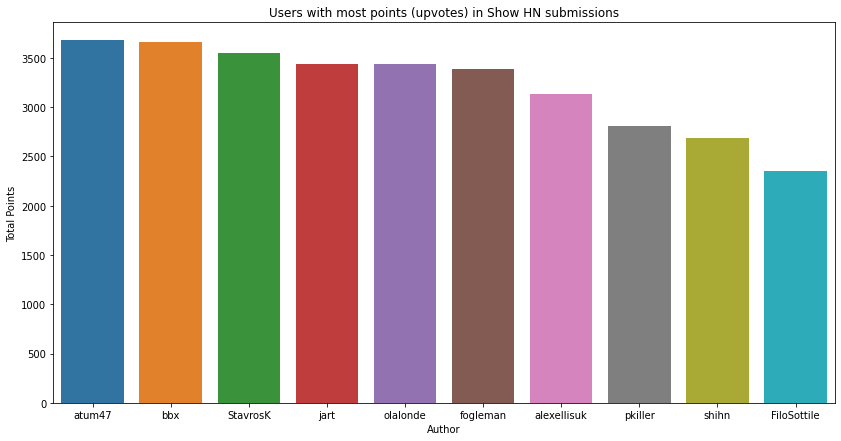

In [451]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Total Points', ascending=False).head(10).reset_index(), x='Author', y='Total Points', ax=ax)
ax.set_title("Users with most points (upvotes) in Show HN submissions")

In [454]:
fig.patch.set_facecolor('white')
fig.savefig("authors/show_hn_most_points.png")

## Ask HN

In [456]:
ask_df = df.query("`Post Type` == 'ask_hn'")

In [457]:
user_df = ask_df.groupby('Author').agg({'Object ID': ['size'], 'Points': ['sum']})

In [458]:
user_df.columns = user_df.columns.droplevel(0)

In [459]:
user_df.rename(columns={'size': 'Num Posts', 'sum': 'Total Points'}, inplace=True)

In [465]:
user_df.drop('whoishiring', inplace=True)

#### Users with most submissions

In [466]:
user_df.sort_values(by='Num Posts', ascending=False).head(10)

,Num Posts,Total Points
Author,,
amichail,408,2227
andrewstuart,274,3047
hoodoof,228,1741
chirau,223,716
tmaly,212,1723
hsikka,207,2668
tixocloud,204,1219
rblion,168,1314
arikr,163,2078


Text(0.5, 1.0, 'Users with most "Ask HN" submissions')

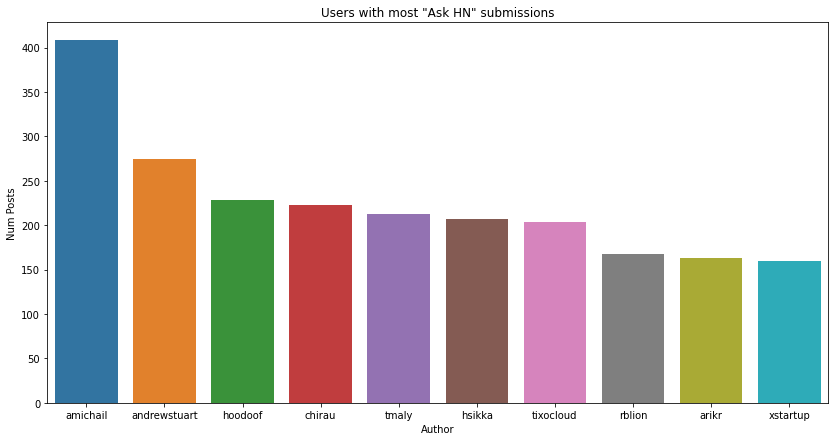

In [468]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Num Posts', ascending=False).head(10).reset_index(), x='Author', y='Num Posts', ax=ax)
ax.set_title('Users with most "Ask HN" submissions')

In [470]:
fig.patch.set_facecolor('white')
fig.savefig("authors/ask_hn_most_submissions.png")

#### Users with highest upvotes

In [473]:
user_df.sort_values(by='Total Points', ascending=False).head(10)

,Num Posts,Total Points
Author,,
zachrip,4,3584
akudha,62,3090
andrewstuart,274,3047
behnamoh,149,3026
whitepoplar,93,2888
rayalez,149,2683
hsikka,207,2668
genedangelo,1,2634
lainon,60,2630


Text(0.5, 1.0, 'Users with most points (upvotes) in Ask HN submissions')

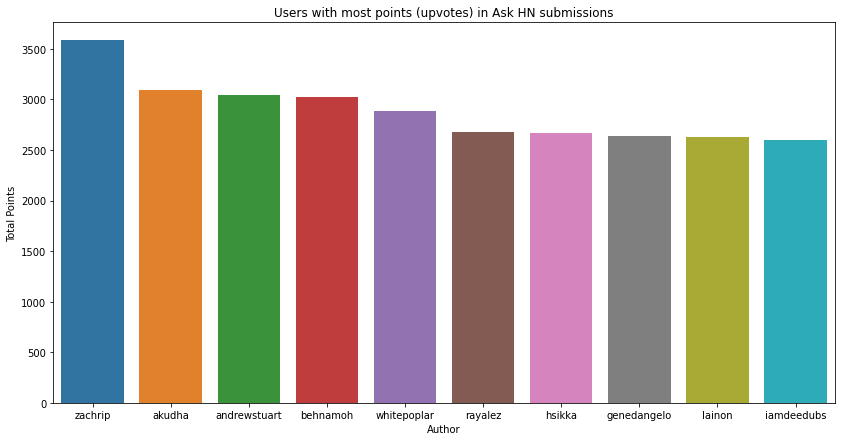

In [476]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Total Points', ascending=False).head(10).reset_index(), x='Author', y='Total Points', ax=ax)
ax.set_title("Users with most points (upvotes) in Ask HN submissions")

In [477]:
fig.patch.set_facecolor('white')
fig.savefig("authors/ask_hn_most_points.png")

## Update 2022

In [182]:
df.head()

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0


In [479]:
df_2022 = df.loc[df['Created At'].dt.year == 2022]

In [480]:
user_df = df_2022.groupby('Author').agg({'Object ID': ['size'], 'Points': ['sum']})

In [481]:
user_df.columns = user_df.columns.droplevel(0)

In [482]:
user_df.rename(columns={'size': 'Num Posts', 'sum': 'Total Points'}, inplace=True)

#### Users with most submissions in 2022

In [483]:
user_df.sort_values(by='Num Posts', ascending=False).head(10)

,Num Posts,Total Points
Author,,
Tomte,4080,46415
mooreds,2645,27054
rntn,1951,16051
rbanffy,1922,14731
todsacerdoti,1834,61589
tosh,1816,40328
pseudolus,1619,33930
gmays,1133,14112
PaulHoule,1072,9180


In [484]:
user_df.sort_values(by='Num Posts', ascending=False).head(10).merge(
    pd.read_csv('user_twitter.csv'),
    left_index=True,
    right_on='username'
)

,Num Posts,Total Points,username,twitter_handle
4,2645,27054,mooreds,mooreds
0,1922,14731,rbanffy,0xDEADBEEFCAFE
5,1834,61589,todsacerdoti,tod
1,1816,40328,tosh,__tosh
19,1072,9180,PaulHoule,paul_houle
2,973,13441,bookofjoe,bookofjoe


Text(0.5, 1.0, 'Users with most submissions in 2022')

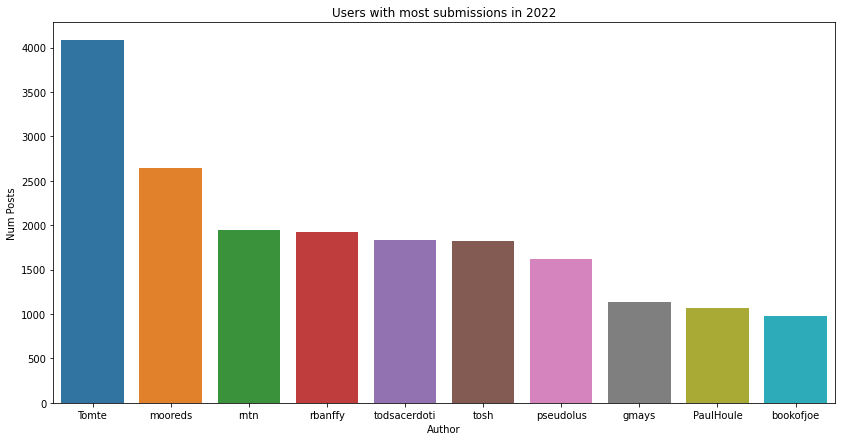

In [485]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Num Posts', ascending=False).head(10).reset_index(), x='Author', y='Num Posts', ax=ax)
ax.set_title("Users with most submissions in 2022")

In [486]:
fig.patch.set_facecolor('white')
fig.savefig("authors/users_most_submissions_2022.png")

#### Users with highest upvotes in 2022

In [ ]:
user_df.sort_values(by='Total Points', ascending=False).head(10)

,Num Posts,Total Points
Author,,
todsacerdoti,1834,61589
Tomte,4080,46415
tosh,1816,40328
pseudolus,1619,33930
zdw,468,29809
mooreds,2645,27054
prostoalex,640,24059
ingve,785,22060
memorable,935,21074


Text(0.5, 1.0, 'Authors with most points (upvoted submissions) in 2022')

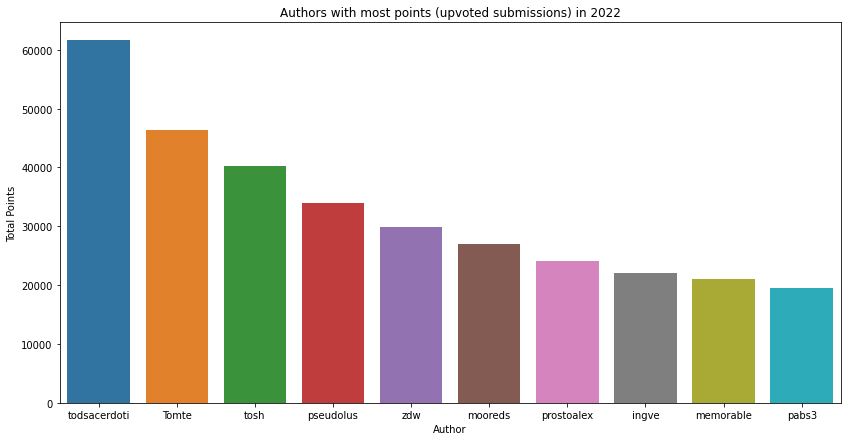

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=user_df.sort_values(by='Total Points', ascending=False).head(10).reset_index(), x='Author', y='Total Points', ax=ax)
ax.set_title("Authors with most points (upvoted submissions) in 2022")

In [491]:
fig.patch.set_facecolor('white')
fig.savefig("authors/users_most_points_2022.png")

## Weekly Submissions (2022)

In [513]:
df_2022_top_users = df_2022.loc[df_2022['Author'].isin(user_df.sort_values(by='Num Posts', ascending=False).head(10).index)]

In [514]:
weekly_df = df_2022_top_users.sort_values(by='Created At').groupby(
    ['Author', pd.Grouper(key='Created At', freq='W-MON')]).size().to_frame().reset_index().rename(columns={0: 'Number of Submissions'})
weekly_df

,Author,Created At,Number of Submissions
0,PaulHoule,2022-01-03,5
1,PaulHoule,2022-01-10,15
2,PaulHoule,2022-01-17,19
3,PaulHoule,2022-01-24,31
4,PaulHoule,2022-01-31,21
...,...,...,...
372,tosh,2022-08-22,24
373,tosh,2022-08-29,16
374,tosh,2022-09-05,36
375,tosh,2022-09-12,47


In [515]:
weekly_df['Author'].unique()

array(['PaulHoule', 'Tomte', 'bookofjoe', 'gmays', 'mooreds', 'pseudolus',
       'rbanffy', 'rntn', 'todsacerdoti', 'tosh'], dtype=object)

Text(0.5, 1.0, 'Weekly submissions for top users in 2022')

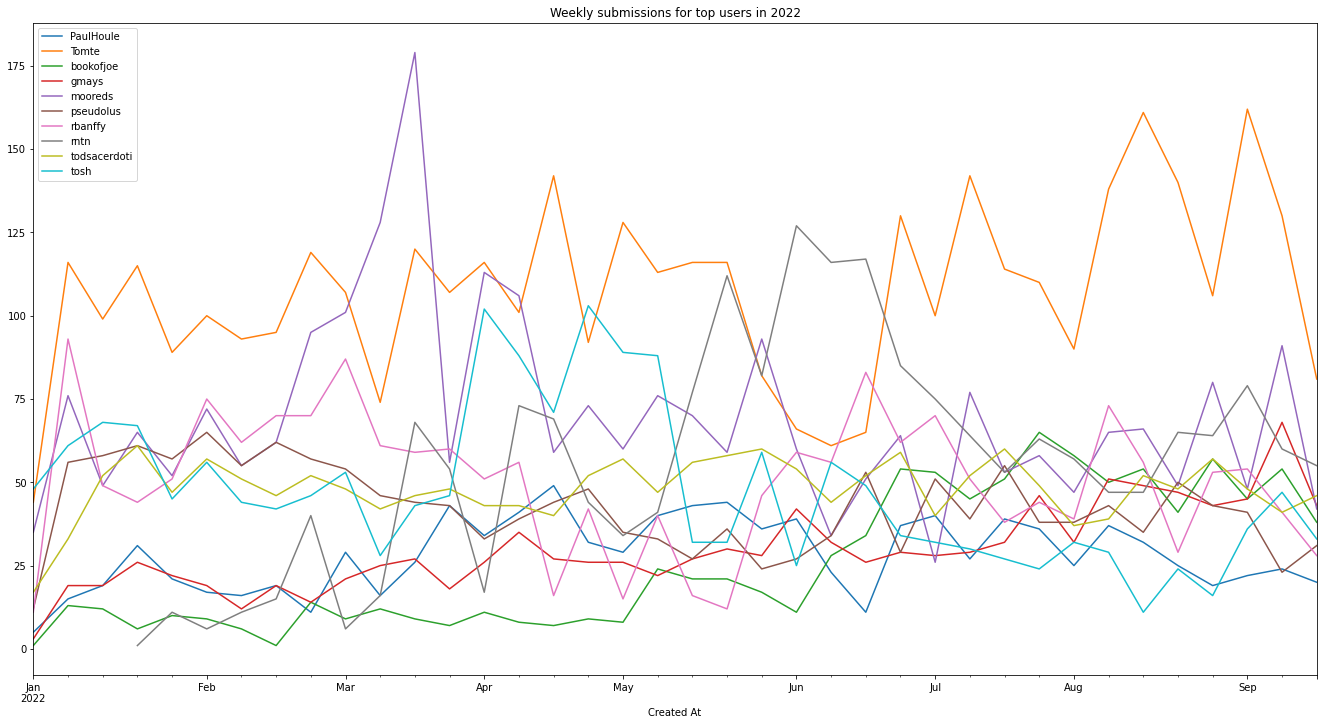

In [516]:
fig, ax = plt.subplots(figsize=(23, 12))
for author in weekly_df['Author'].unique():
    weekly_df.loc[weekly_df['Author'] == author].set_index('Created At')['Number of Submissions'].plot(ax=ax)
ax.legend(list(weekly_df['Author'].unique()))

ax.set_title("Weekly submissions for top users in 2022")

In [517]:
fig.patch.set_facecolor('white')
fig.savefig('authors/top_user_submissions_per_week_2022.png')

## Weekly Total Upvotes (2022)

In [508]:
df_2022_top_users = df_2022.loc[df_2022['Author'].isin(user_df.sort_values(by='Total Points', ascending=False).head(10).index)]

In [509]:
weekly_df = df_2022_top_users.sort_values(by='Created At').groupby(
    ['Author', pd.Grouper(key='Created At', freq='W-MON')])['Points'].sum().to_frame().reset_index().rename(columns={0: 'Number of Submissions'})
weekly_df

,Author,Created At,Points
0,Tomte,2022-01-03,309
1,Tomte,2022-01-10,340
2,Tomte,2022-01-17,936
3,Tomte,2022-01-24,1223
4,Tomte,2022-01-31,672
...,...,...,...
359,zdw,2022-08-22,523
360,zdw,2022-08-29,362
361,zdw,2022-09-05,1061
362,zdw,2022-09-12,1119


In [510]:
weekly_df['Author'].unique()

array(['Tomte', 'ingve', 'memorable', 'mooreds', 'pabs3', 'prostoalex',
       'pseudolus', 'todsacerdoti', 'tosh', 'zdw'], dtype=object)

Text(0.5, 1.0, 'Points earned (upvotes) per week for top users in 2022')

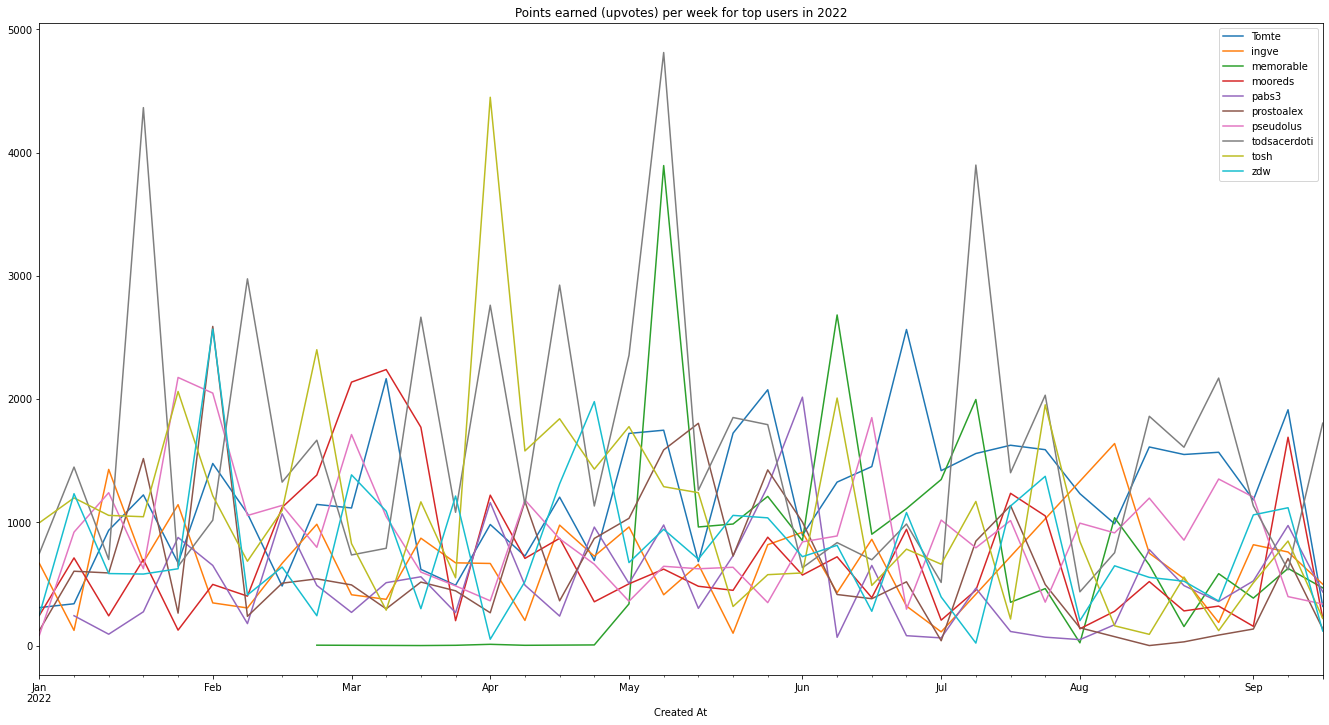

In [511]:
fig, ax = plt.subplots(figsize=(23, 12))
for author in weekly_df['Author'].unique():
    weekly_df.loc[weekly_df['Author'] == author].set_index('Created At')['Points'].plot(ax=ax)
ax.legend(list(weekly_df['Author'].unique()))

ax.set_title("Points earned (upvotes) per week for top users in 2022")

In [512]:
fig.patch.set_facecolor('white')
fig.savefig('authors/top_user_upvotes_per_week_2022.png')